In [2]:
!pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from yahoo_fin import stock_info as si
from datetime import datetime, timedelta
start_date = datetime(2014, 12, 29)
end_date = datetime(2018, 12, 28)

nifty50_data = si.get_data('^NSEI', start_date, end_date)

In [4]:
nifty50_data

,open,high,low,close,adjclose,volume,ticker
2014-12-29,8214.700195,8279.150391,8214.700195,8246.299805,8246.299805,82100.0,^NSEI
2014-12-30,8260.299805,8268.250000,8220.549805,8248.250000,8248.250000,77700.0,^NSEI
2014-12-31,8243.900391,8291.000000,8243.750000,8282.700195,8282.700195,84500.0,^NSEI
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,^NSEI
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900.0,^NSEI
...,...,...,...,...,...,...,...
2018-12-20,10885.200195,10962.549805,10880.049805,10951.700195,10951.700195,318900.0,^NSEI
2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0,^NSEI
2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0,^NSEI
2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0,^NSEI


In [5]:
nifty50_data=nifty50_data.drop(columns=['adjclose','volume','ticker'])
nifty50_data=nifty50_data.dropna()

In [6]:
nifty50_data

,open,high,low,close
2014-12-29,8214.700195,8279.150391,8214.700195,8246.299805
2014-12-30,8260.299805,8268.250000,8220.549805,8248.250000
2014-12-31,8243.900391,8291.000000,8243.750000,8282.700195
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391
...,...,...,...,...
2018-12-20,10885.200195,10962.549805,10880.049805,10951.700195
2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000
2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000
2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609


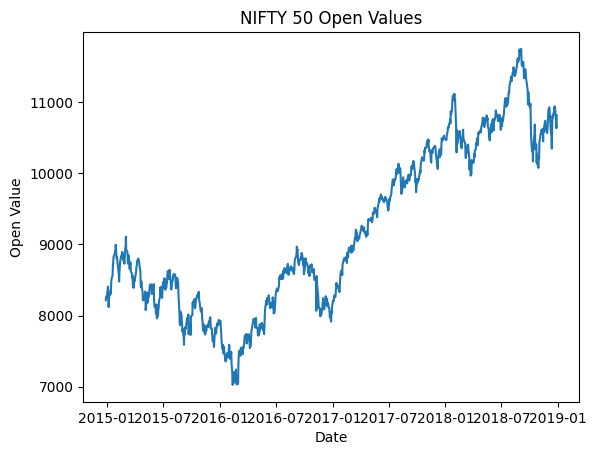

In [7]:
import matplotlib.pyplot as plt

# Plotting the open values
plt.plot(nifty50_data.index, nifty50_data['open'])
plt.title('NIFTY 50 Open Values')
plt.xlabel('Date')
plt.ylabel('Open Value')
plt.show()

In [10]:
start_date = datetime(2018, 12, 31)
end_date = datetime(2020, 7, 31)

test_data = si.get_data('^NSEI', start_date, end_date)

In [11]:
test_data=test_data.drop(columns=['adjclose','volume','ticker'])

In [12]:
test_data=test_data.dropna()

In [13]:
test_data

,open,high,low,close
2018-12-31,10913.200195,10923.549805,10853.200195,10862.549805
2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000
2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000
2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609
2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805
...,...,...,...,...
2020-07-24,11149.950195,11225.400391,11090.299805,11194.150391
2020-07-27,11225.000000,11225.000000,11087.849609,11131.799805
2020-07-28,11154.099609,11317.750000,11151.400391,11300.549805
2020-07-29,11276.900391,11341.400391,11149.750000,11202.849609


In [14]:
import numpy as np
from numpy import split

In [15]:
nifty50_data.shape

(982, 4)

In [16]:
nifty50_data = nifty50_data.drop(nifty50_data.index[-2:])
nifty50_data.shape

(980, 4)

In [17]:
test_data.shape

(386, 4)

In [18]:
test_data = test_data.drop(test_data.index[-1])
test_data.shape

(385, 4)

In [19]:
train=np.array(split(nifty50_data,len(nifty50_data)/5))

In [33]:
train.shape

(196, 5, 4)

In [20]:
test=np.array(split(test_data,len(test_data)/5))

In [21]:
test.shape

(77, 5, 4)

In [45]:
from math import sqrt
from numpy import array
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [44]:
def evaluate_forecasts(actual, predicted):
 scores = list()
 for i in range(actual.shape[1]):
     mse = mean_squared_error(actual[:, i], predicted[:, i])
     rmse = sqrt(mse)
     scores.append(rmse)
 s = 0
 for row in range(actual.shape[0]):
     for col in range(actual.shape[1]):
         s += (actual[row, col] - predicted[row, col])**2
 score = sqrt(s / (actual.shape[0] * actual.shape[1]))
 return score, scores

In [46]:
def to_supervised(train, n_input, n_out=5):
 data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
 X, y = list(), list()
 in_start = 0
 for _ in range(len(data)):
    in_end = in_start + n_input
    out_end = in_end + n_out
    if out_end <= len(data):
      x_input = data[in_start:in_end, 0]
      x_input = x_input.reshape((len(x_input), 1))
      X.append(x_input)
      y.append(data[in_end:out_end, 0])
    in_start += 1
 return array(X), array(y)
 

In [47]:
def build_model(train, n_input):
	train_x, train_y = to_supervised(train, n_input)
	verbose, epochs, batch_size = 0, 20, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	model = Sequential()
	model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

In [48]:
def forecast(model, history, n_input):
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	input_x = data[-n_input:, 0]
	input_x = input_x.reshape((1, len(input_x), 1))
	yhat = model.predict(input_x, verbose=0)
	yhat = yhat[0]
	return yhat


In [42]:
def summarize_scores(name, score, scores):
   s_scores = ', '.join(['%.1f' % s for s in scores])
   print('%s (RMSE): [%.3f] %s' % (name, score, s_scores))
   score2 = score/11070.59
   #we are dividing by 11070.59 because it is the mean as reported in the paper
   scores2 = [s / 11070.59 for s in scores]
   s_scores2 = ', '.join(['%.3f' % s for s in scores2])
   print('%s (RMSE/Mean): [%.3f] %s' % (name, score2, s_scores2))

In [49]:
def evaluate_model(train, test, n_input):
	model = build_model(train, n_input)
	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
		yhat_sequence = forecast(model, history, n_input)
		predictions.append(yhat_sequence)
		history.append(test[i, :])
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

In [50]:
n_input=10
score, scores = evaluate_model(train, test, n_input)
summarize_scores('lstm', score, scores)

lstm (RMSE): [404.403] 286.1, 368.2, 417.9, 439.2, 482.5
lstm (RMSE/Mean): [0.037] 0.026, 0.033, 0.038, 0.040, 0.044
